In [155]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tabulate import tabulate
from sklearn.metrics import roc_curve, auc

In [119]:
# Load the newly uploaded dataset
df = pd.read_csv(r"Dataset.csv")
# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [121]:
# Basic dataset info
num_rows, num_columns = df.shape
missing_values = df.isnull().sum().sum()
duplicate_rows = df.duplicated().sum()
data_types = df.dtypes.value_counts()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Class balance for target variable
attrition_distribution = df['Attrition'].value_counts()

# Prepare summary
summary = {
    "Number of rows": num_rows,
    "Number of columns": num_columns,
    "Missing values": missing_values,
    "Duplicate rows": duplicate_rows,
    "Categorical columns": len(categorical_columns),
    "Numerical columns": len(numerical_columns),
    "Binary columns": len(binary_columns),
    "Attrition distribution": attrition_distribution.to_dict()
}
summary

{'Number of rows': 1470,
 'Number of columns': 35,
 'Missing values': 0,
 'Duplicate rows': 0,
 'Categorical columns': 9,
 'Numerical columns': 26,
 'Binary columns': 4,
 'Attrition distribution': {'No': 1233, 'Yes': 237}}

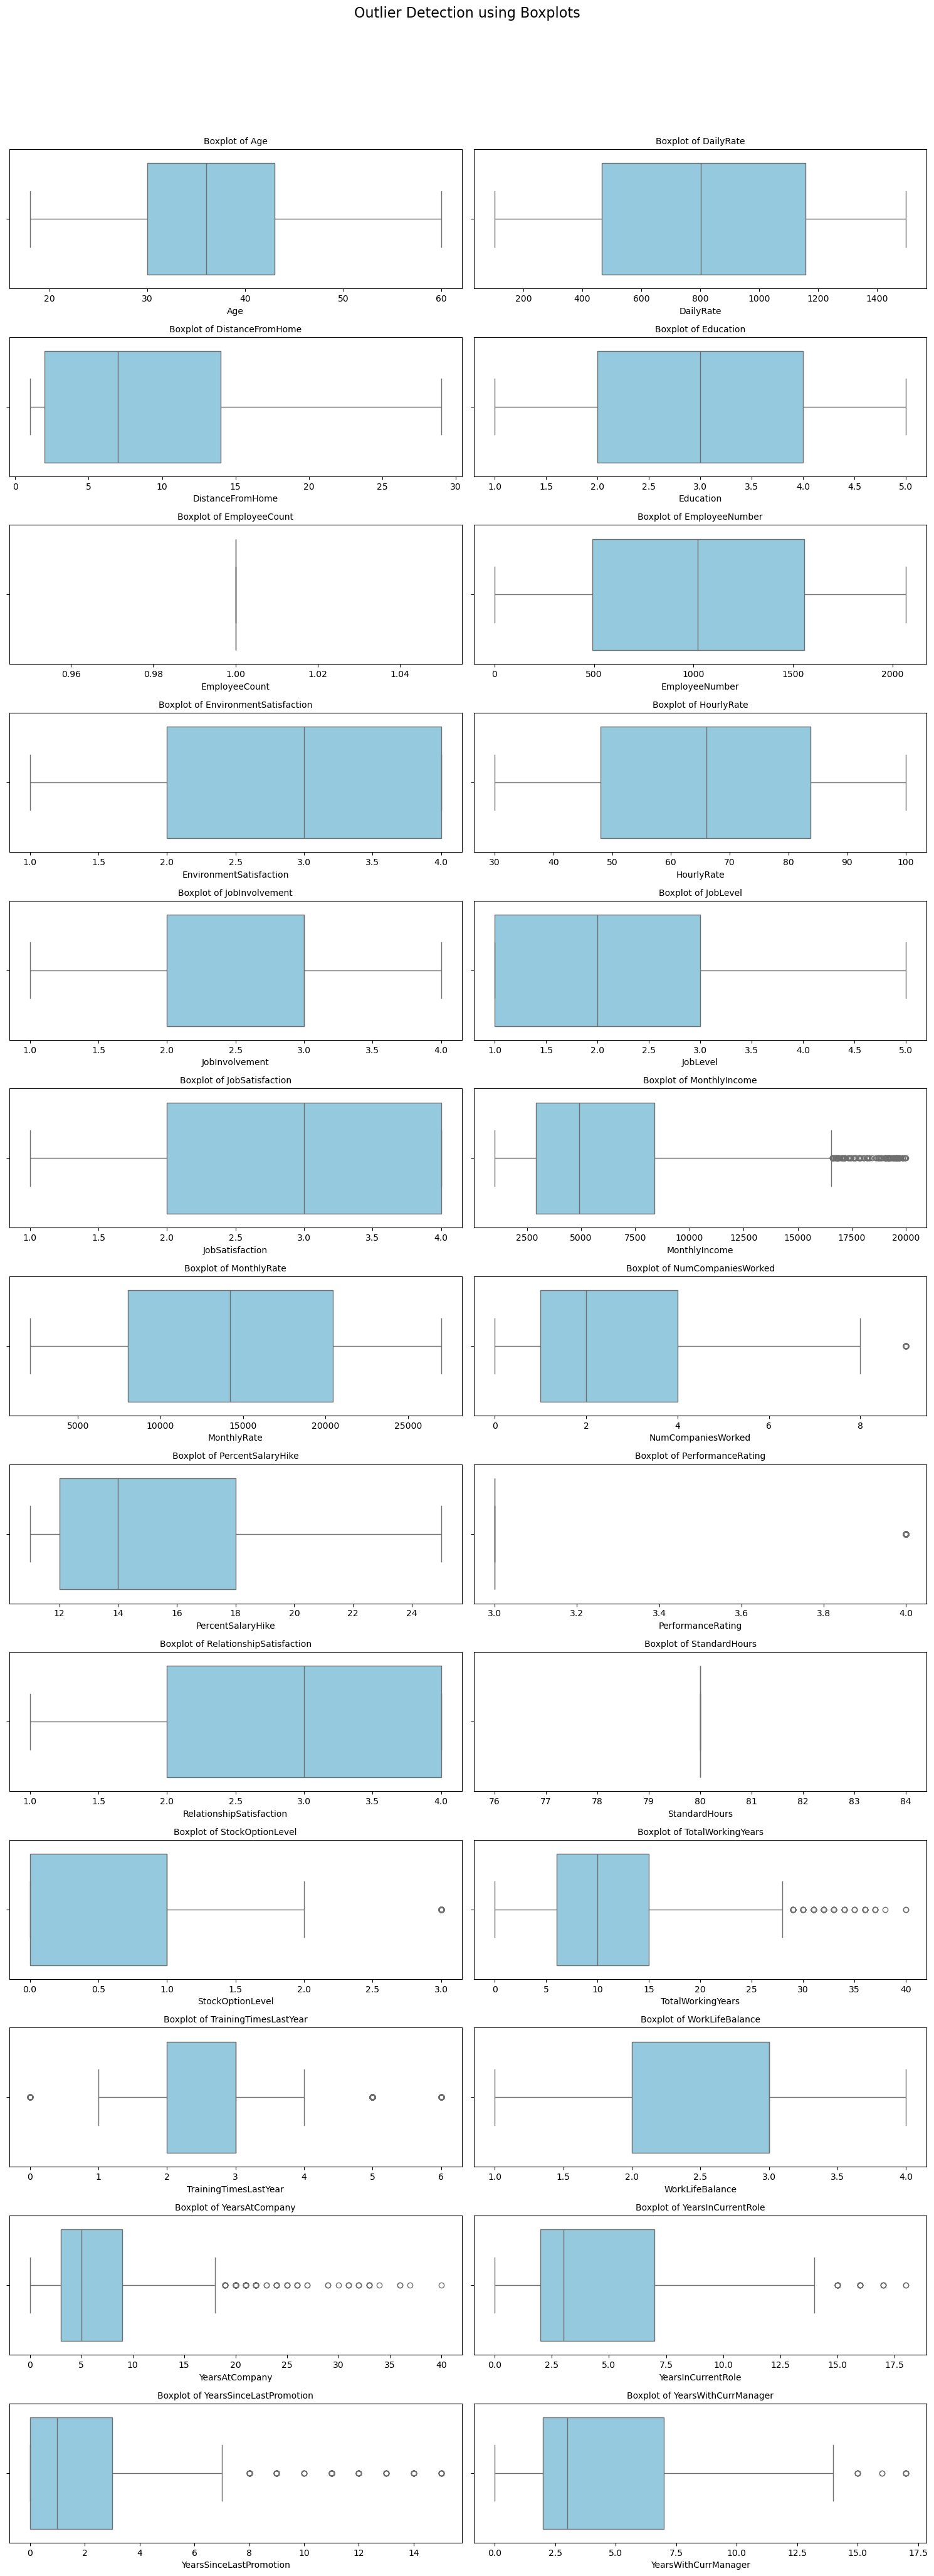

In [123]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Set up the plot grid
plt.figure(figsize=(15, len(numeric_cols) * 3))
# Loop through numeric columns to plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.tight_layout()
plt.suptitle("Outlier Detection using Boxplots", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_22700\3433561368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="Set2")


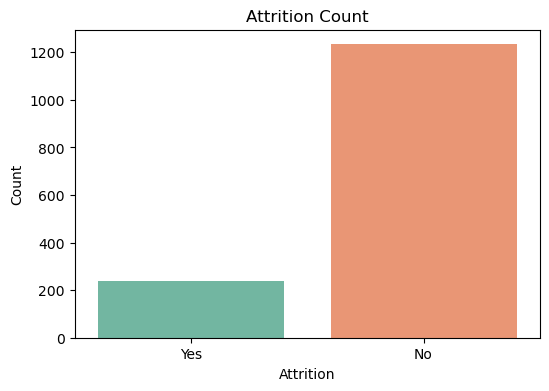

In [124]:
# Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="Set2")
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

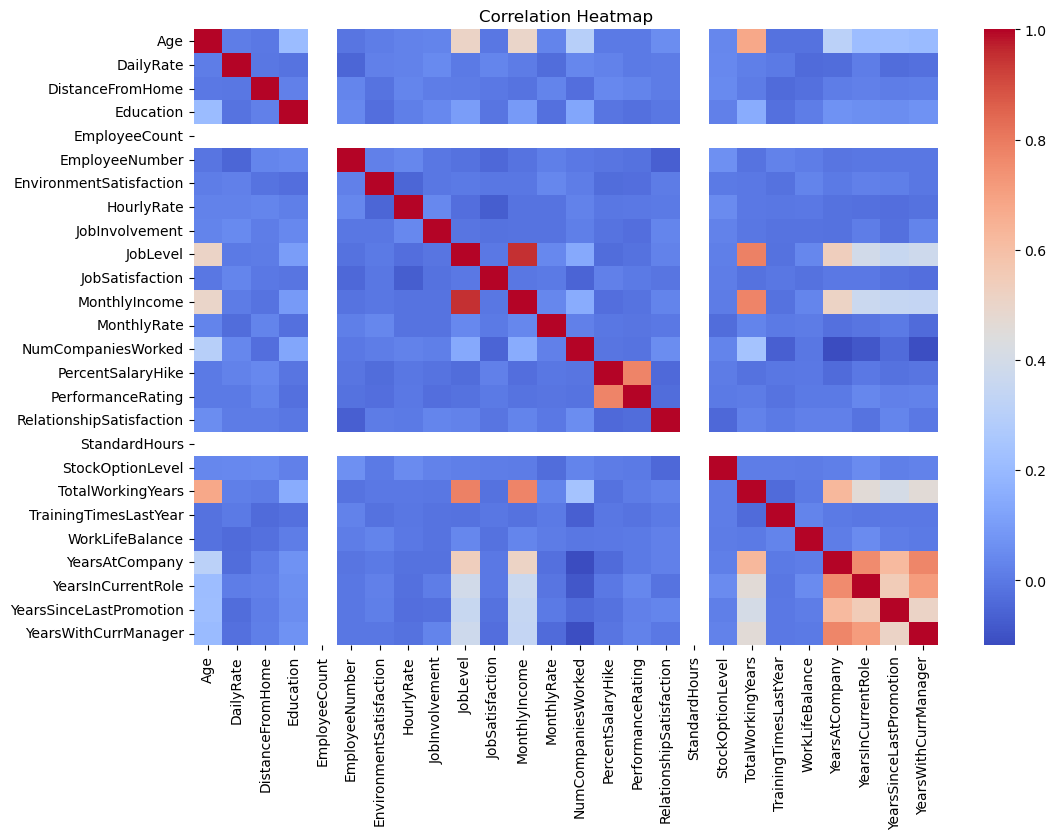

In [125]:
# Plot: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_22700\266434867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="Age", palette="Set3")


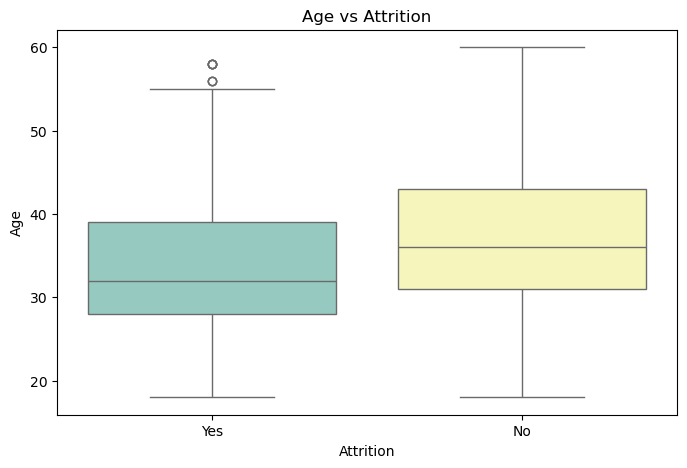

In [126]:
# Box plot of Age vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="Age", palette="Set3")
plt.title("Age vs Attrition")
plt.show()

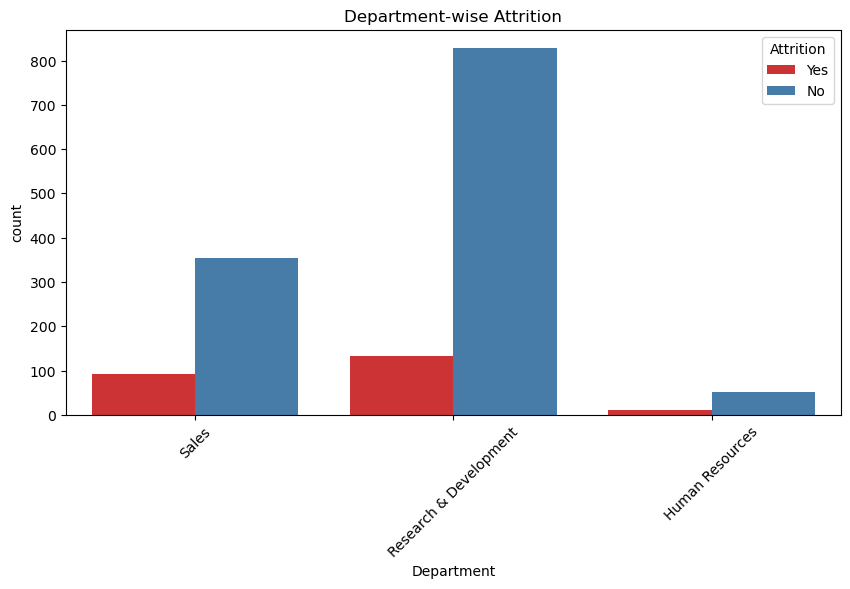

In [127]:
# Countplot for Department vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set1")
plt.title("Department-wise Attrition")
plt.xticks(rotation=45)
plt.show()

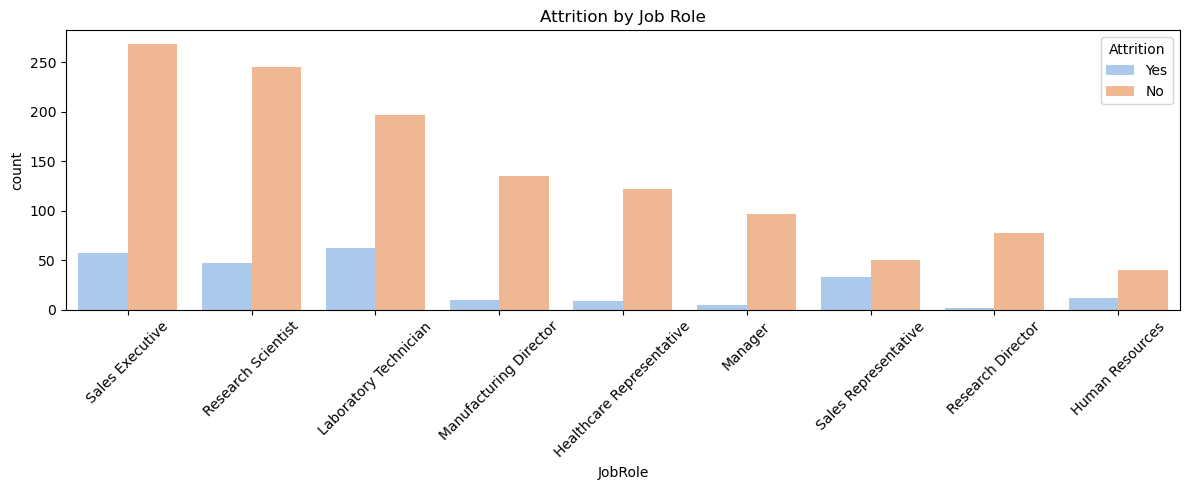

In [128]:
# Bar plot for JobRole vs Attrition
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="JobRole", hue="Attrition", palette="pastel")
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_22700\1934724423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="cool")


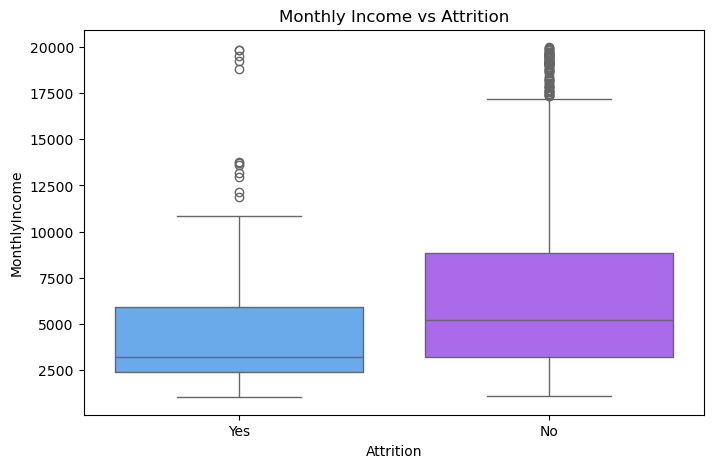

In [129]:
# Boxplot Attrition vs Monthly Income
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="cool")
plt.title("Monthly Income vs Attrition")
plt.show()

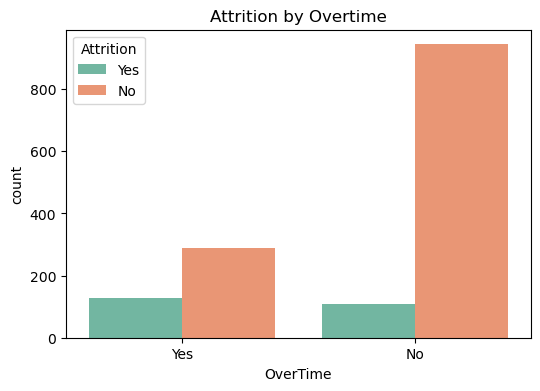

In [132]:
# Countplot for Attrition by Overtime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="OverTime", hue="Attrition", palette="Set2")
plt.title("Attrition by Overtime")
plt.show()

In [139]:
# Encode the target variable
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])

# Split features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [141]:
# Preprocessing for numerical data
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# Define the pipeline with XGBoost
xgb_pipeline_updated = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(random_state=42, eval_metric='logloss'))  # No deprecated param
])

In [147]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
xgb_pipeline_updated.fit(X_train, y_train)

# Predict
y_pred = xgb_pipeline_updated.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

In [149]:
# Classification Report as Table
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
table_data = []
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):
        row = [label] + [f"{metrics[metric]:.2f}" for metric in ["precision", "recall", "f1-score", "support"]]
        table_data.append(row)

headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
report_table = tabulate(table_data, headers=headers, tablefmt="grid")

In [151]:
# Display
print("Model Accuracy:", accuracy)
print(report_table)

Model Accuracy: 0.8707482993197279
+--------------+-------------+----------+------------+-----------+
| Class        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| No           |        0.9  |     0.96 |       0.93 |       255 |
+--------------+-------------+----------+------------+-----------+
| Yes          |        0.52 |     0.28 |       0.37 |        39 |
+--------------+-------------+----------+------------+-----------+
| macro avg    |        0.71 |     0.62 |       0.65 |       294 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |        0.85 |     0.87 |       0.85 |       294 |
+--------------+-------------+----------+------------+-----------+


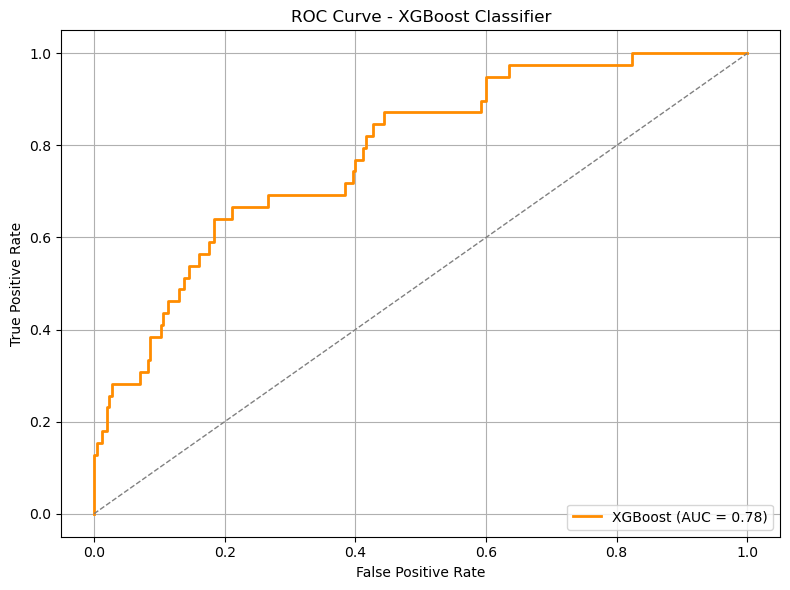

In [157]:
# Predict probabilities for the positive class
xgb_probs = xgb_pipeline_updated.predict_proba(X_test)[:, 1]

# Compute False Positive Rate and True Positive Rate
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Plot settings
plt.title('ROC Curve - XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()